In [2]:
import tensorflow as tf
import sys
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import layers, models
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd


In [4]:

# Loading CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Show shape of input data
print('Training data shape: ', X_train.shape)
print('Training data labels shape: ', y_train.shape)
print('Testing data shape: ', X_test.shape)
print('Testing data labels shape: ', y_test.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train = X_train / 255.0
X_test = X_test / 255.0


Training data shape: (50000, 32, 32, 3)
Training data labels shape (50000, 1)
Kształt danych treningowych: (10000, 32, 32, 3)
Kształt etykiet treningowych: (10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:

# number of classes
y_train = y_train.reshape(-1,)
K = len(set(y_train))

# get total number of classes for output layer
print("Number of classes:", K)


number of classes: 10


In [ ]:

# Model with 80% accuracy
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))


# model description
model.summary()
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
# LEARNING PROCESS DEPENDENCIES
early_stopping = EarlyStopping(monitor='accuracy', patience=3)

# LEARNING PROCESS
history = model.fit(X_train, y_train, batch_size = 1280, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
40/40 [==============================] - 695s 17s/step - loss: 1.7881 - accuracy: 0.3510 - val_loss: 2.6624 - val_accuracy: 0.1000
Epoch 2/100
40/40 [==============================] - 693s 17s/step - loss: 1.1914 - accuracy: 0.5672 - val_loss: 2.9855 - val_accuracy: 0.0999
Epoch 3/100
40/40 [==============================] - 696s 17s/step - loss: 0.9196 - accuracy: 0.6704 - val_loss: 2.6638 - val_accuracy: 0.1185
Epoch 4/100
40/40 [==============================] - 695s 17s/step - loss: 0.7377 - accuracy: 0.7389 - val_loss: 2.7856 - val_accuracy: 0.1058
Epoch 5/100
40/40 [==============================] - 678s 17s/step - loss: 0.5933 - accuracy: 0.7909 - val_loss: 2.6394 - val_accuracy: 0.1687
Epoch 6/100
40/40 [==============================] - 655s 16s/step - loss: 0.4648 - accuracy: 0.8365 - val_loss: 3.0042 - val_accuracy: 0.1578
Epoch 7/100
40/40 [==============================] - 664s 17s/step - loss: 0.3880 - accuracy: 0.8635 - val_loss: 3.6401 - val_accuracy: 0.1554

313/313 [==============================] - 1s 2ms/step
[[2.1477789e-10 2.4455669e-14 4.4581667e-09 ... 1.3231911e-13
  6.6859708e-12 1.7070082e-13]
 [1.1414124e-13 5.3391532e-06 5.7659721e-24 ... 3.1678200e-31
  9.9999464e-01 6.7437626e-14]
 [1.1265476e-02 2.0517756e-03 6.8032403e-12 ... 4.6196608e-13
  9.8663282e-01 4.9883947e-05]
 ...
 [2.9079647e-11 6.3436839e-15 7.8871271e-06 ... 9.5114374e-05
  1.1243800e-14 7.1209742e-16]
 [3.6379304e-02 9.6360826e-01 7.0624467e-10 ... 3.5363625e-11
  2.7603252e-07 1.2054623e-05]
 [3.4918265e-27 3.9868701e-31 1.6614838e-27 ... 1.0000000e+00
  1.7929305e-29 2.9517510e-28]]


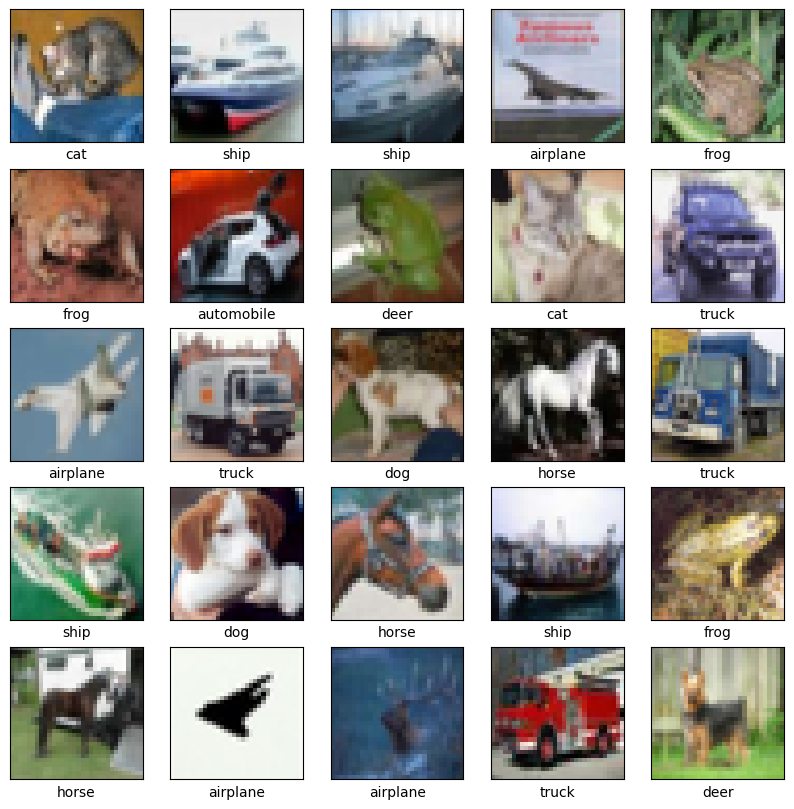

313/313 - 1s - loss: 0.9002 - accuracy: 0.8261 - 922ms/epoch - 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.91      0.92      0.91      1000
           2       0.76      0.76      0.76      1000
           3       0.65      0.68      0.67      1000
           4       0.85      0.78      0.81      1000
           5       0.79      0.71      0.75      1000
           6       0.90      0.83      0.87      1000
           7       0.84      0.88      0.86      1000
           8       0.88      0.92      0.90      1000
           9       0.90      0.89      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

confusion matrix:
 [[890   3  16  12   9   5   1   8  34  22]
 [  9 922   3   3   2   1   1   1  21  37]
 [ 72   3 761  41  30  33  32  16   7  

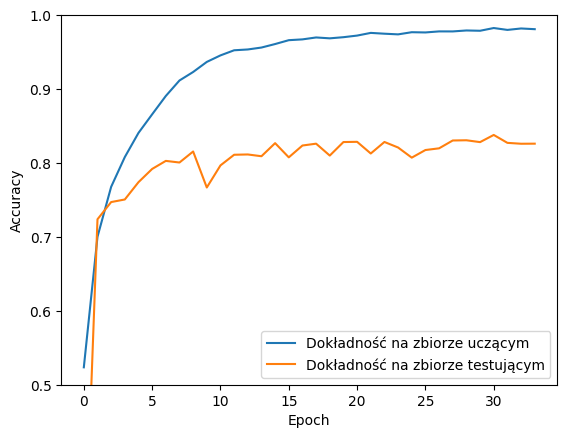

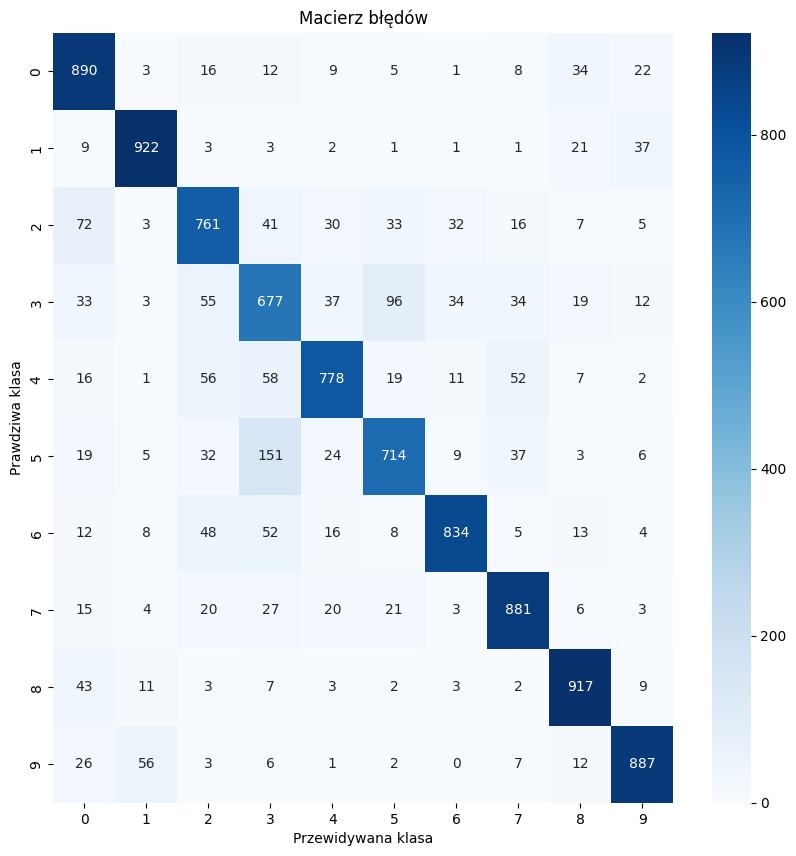

In [ ]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

plt.figure(figsize=(10,10))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(X_test[i])

     plt.xlabel(labels[y_classes[i]])
plt.show()

plt.plot(history.history['accuracy'], label='Dokładność na zbiorze uczącym')
plt.plot(history.history['val_accuracy'], label='Dokładność na zbiorze testującym')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print("Classification Report: \n", classification_report(y_test, y_classes))
cm = confusion_matrix(y_test, y_classes)
print("confusion matrix:\n", confusion_matrix(y_test, y_classes))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Macierz błędów')
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidywana klasa')

plt.show()


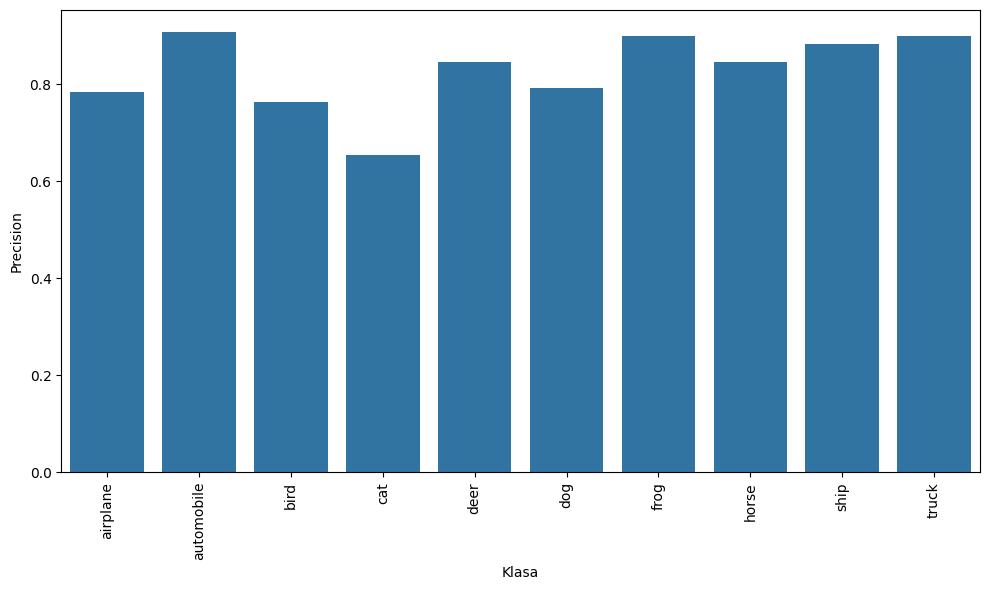

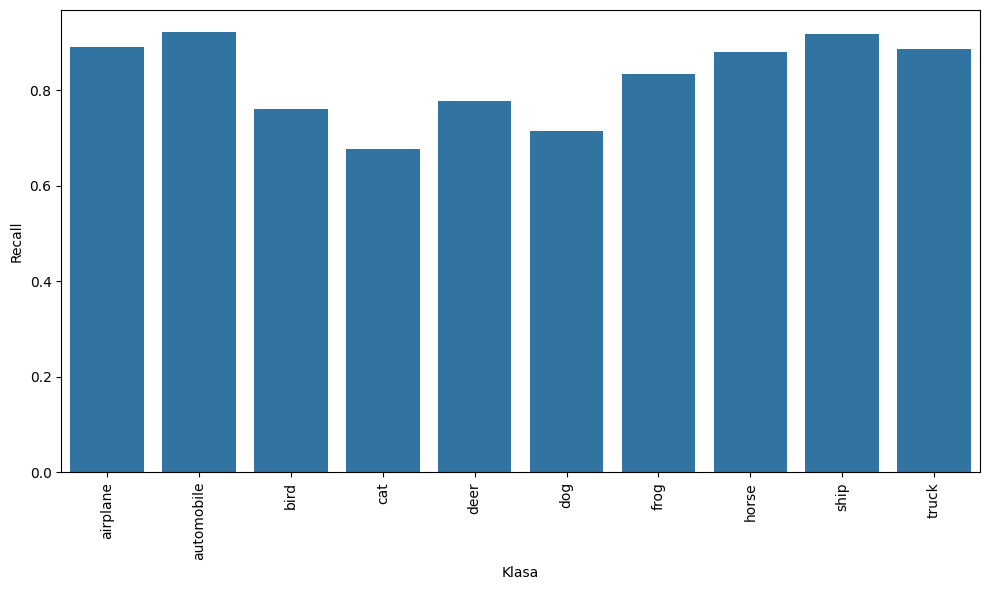

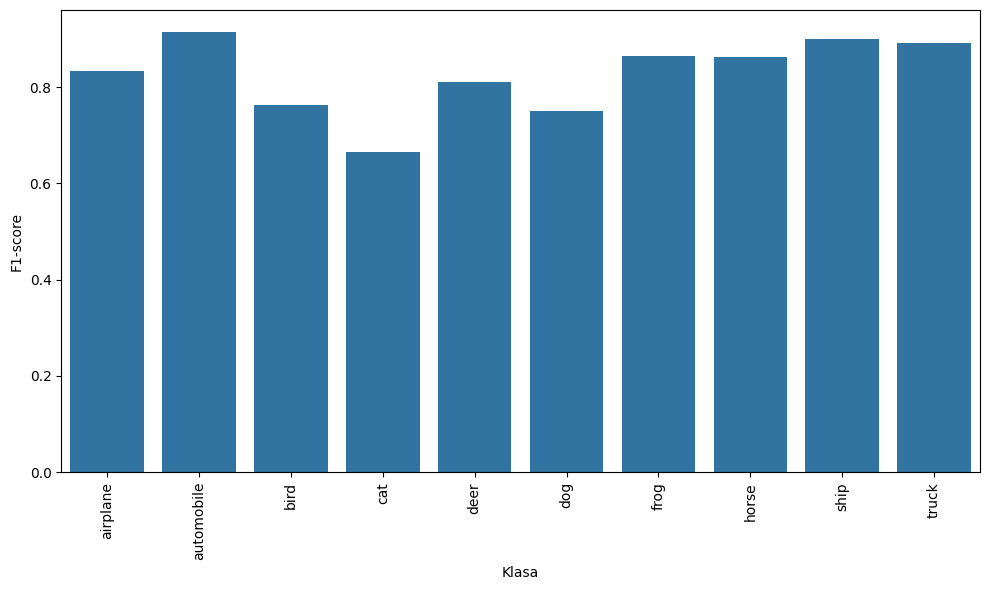

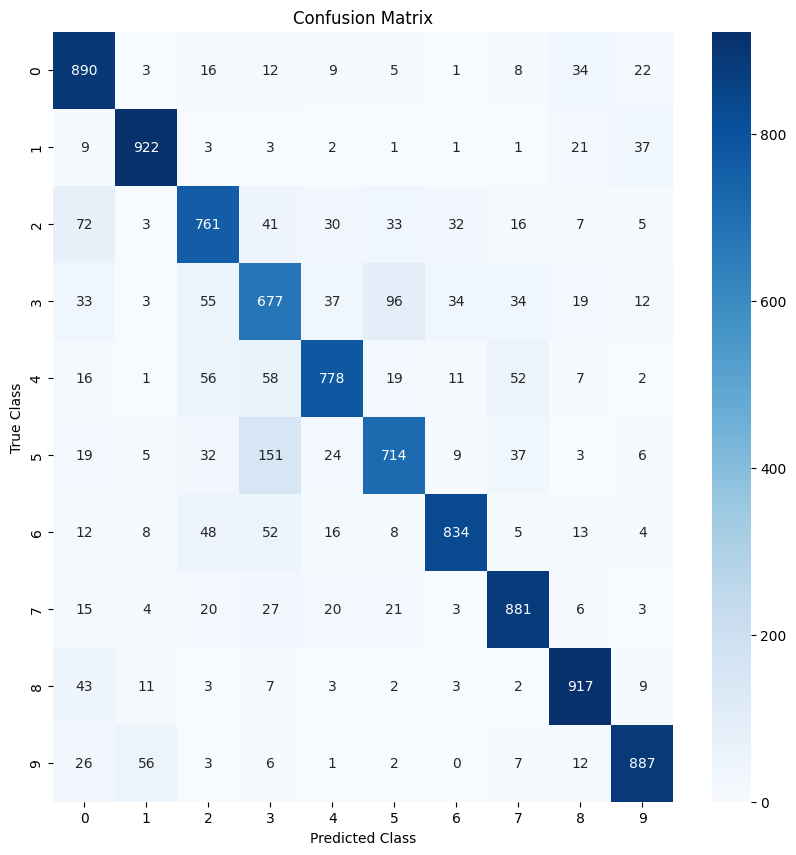

In [ ]:

report = classification_report(y_test, y_classes, output_dict=True)
df = pd.DataFrame(report).transpose()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
df = df.iloc[:-3]
df.index = [labels[int(i)] for i in df.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df.precision)
plt.ylabel('Precision')
plt.xlabel('Klasa')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df.recall)
plt.ylabel('Recall')
plt.xlabel('Klasa')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df['f1-score'])
plt.ylabel('F1-score')
plt.xlabel('Klasa')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

plt.show()

In [ ]:
# First (the simplest) model with ~60% accuracy
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))

# model description
model.summary()
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_23 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                      